<h1>Handwritten Digit Recognition</h1>
<h2>Installing Dependencies</h2>

In [1]:
#cmd command for installing numpy
! pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#cmd command for installing pandas, tensorflow, matplotlib, scikit-learn
! pip install pandas
! pip install tensorflow
! pip install matplotlib
! pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<h2>Importing Dependencies</h2>
<p><code>%load_ext tensorboard</code> is used for loading tensorboard extension. It is a tool that provides visualizations and summarizes of machine learning model during training and evaluation.</p>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%load_ext tensorboard

<h3>t-Distributed Stochastic Neighbor Embedding</h3>
<p>It is a powerful dimensionality reduction technique commonly used in machinelearning and data analysis to visualize high-dimensional data in a lower dimensional space.</p>
<p>t-SNE does: </p>
<ul>
    <li>Dimensionality Reduction</li>
    <li>Maintaining Local Structure</li>
    <li>Non-linear Relationships</li>
</ul>

In [4]:
from sklearn.manifold import TSNE

<h2>Reading data from csv file using Pandas</h2>
<p><code>train.info()</code> is used for getting the information of the data stored in train.</p>
<p><code>train.shape</code> is used for getting the dimension of the train.</p>

In [5]:
train = pd.read_csv('data/train.csv')
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(42000, 785)

In [6]:
test = pd.read_csv('data/test.csv')
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(28000, 784)

<h2>Extracting data from dataframe</h2>
<p><code>x = train.iloc[:, 1:785]</code> is used to extract feature data from the train dataframe. It selects all rows(':') and columns from index 1 to 784.</p>
<p><code>y = train.iloc[:, 0]</code> is used to extract target data from the train dataframe. It selects all rows(':') and columns first</p>
<p><code>x_test = test.iloc[:, 0:784]</code> is used to extract feature data from the test dataframe. It selects all rows(':') and columns from index 0 to 783</p>

In [7]:
x = train.iloc[:, 1:785]
y = train.iloc[:, 0]

x_test = test.iloc[:, 0:784]

<p><code>x_tsn = x/255</code> used for normalization of feature x. Used to convert the 0-255 range data set to [0,1] for preprocessing step for making features consistent and manageable scales.</p>
<p><code>tsne = TSNE(); tsne_res = tsne.fit_transform(x_tsn);</code> used for appling TSNE algorithm to convert higher dimension data set to lower dimension data set.</p>

In [8]:
x_tsn = x/255

tsne = TSNE()
tsne_res = tsne.fit_transform(x_tsn)

In [9]:
print(tsne_res)

[[-45.75364   29.974573]
 [ 82.44745   12.524373]
 [-98.63818   12.253241]
 ...
 [-72.89043  -41.610744]
 [ 65.6656   -42.812023]
 [-12.022743 -65.57994 ]]


<h2>Visualization of the data</h2>
<p>Using matplotlib</p>

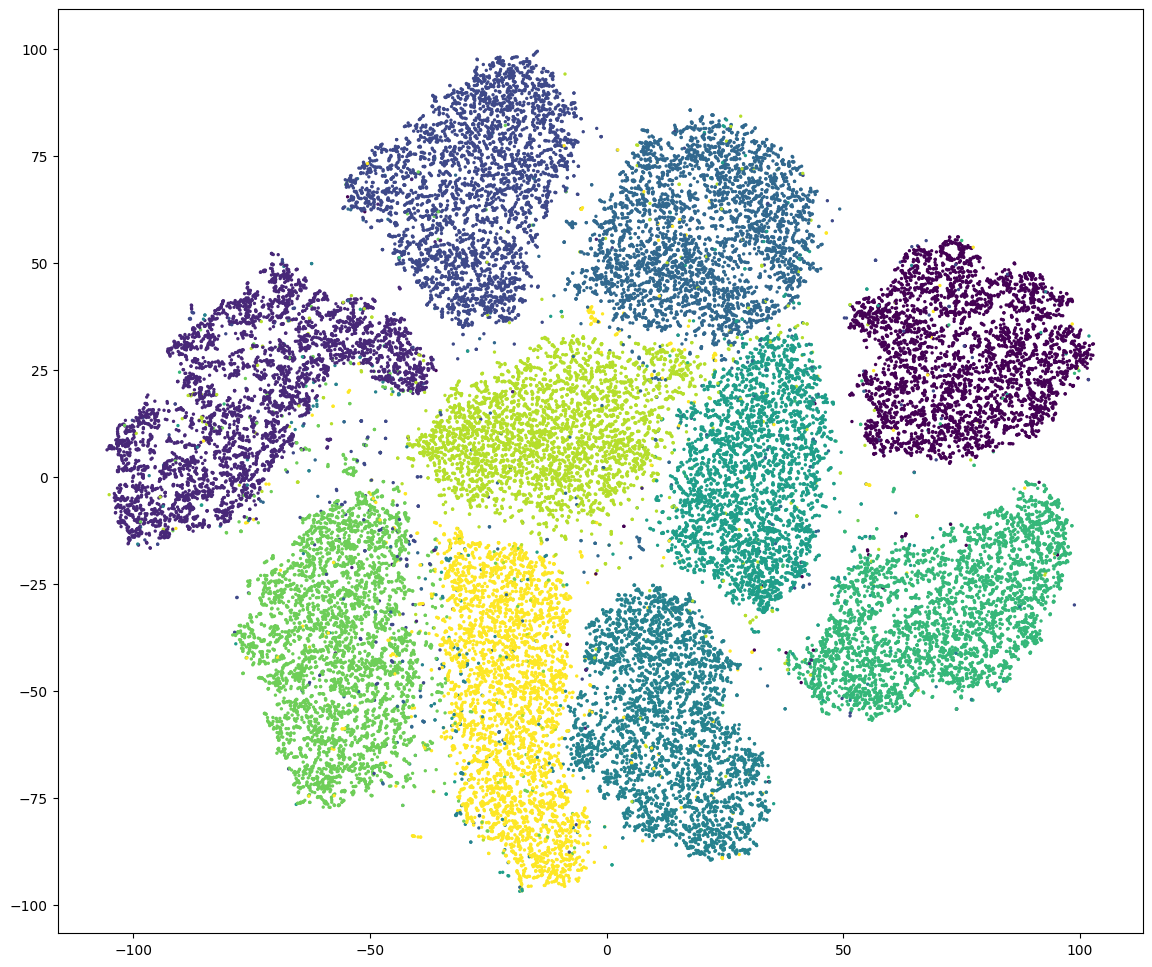

In [10]:
plt.figure(figsize=(14,12))

#tsne_res[:, 0] gives all rows of 0 column created by tsne
#tsne_res[:, 1] gives all rows of 1 column created by tsne
plt.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y, s = 2)

<h2>Dividing train data to train and validation set</h2>
<p>Syntax: <code>train_test_split(feature, target, test_size=n, random_state=v)</code> where n is from range 0 to 1, random_state is used for making the data set random and then constant, so even if the code is run the validation data set doesnot change but remain same as the first </p>

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.2, random_state = 1212)

In [12]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


<h2>Reshaping the data sets</h2>
<p><code>x_train.to_numpy().reshape(33600, 28,28)</code> This code reshapes the size of each data sets to 28 x 28. Here 33600 is the number of datasets, 28 and 28 is the height and width of the image</p>
<p><code>y_train_reshape = y_train.values</code> This code converts pandas series to numpy array.</p>

In [13]:
x_train_reshape = x_train.to_numpy().reshape(33600, 28,28)
y_train_reshape = y_train.values
x_validation_reshape = x_validation.to_numpy().reshape(8400, 28,28)
y_validation_reshape = y_validation.values

x_test_reshape = test.to_numpy().reshape(28000, 28,28)

In [14]:
print(x_train_reshape.shape)
print(y_train_reshape.shape)
print(x_validation_reshape.shape)
print(y_validation_reshape.shape)

(33600, 28, 28)
(33600,)
(8400, 28, 28)
(8400,)


In [15]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_reshape.shape
IMAGE_CHANNELS = 1

print(IMAGE_WIDTH)
print(IMAGE_HEIGHT)
print(IMAGE_CHANNELS)

28
28
1


In [16]:
pd.DataFrame(x_train_reshape[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


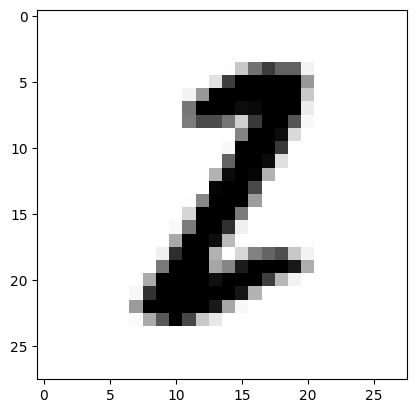

In [17]:
plt.imshow(x_train_reshape[0], cmap=plt.cm.binary)
plt.show()

<h2>Converting to single channel</h2>
<p>In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).</p>

In [18]:
x_train_with_chanels = x_train_reshape.reshape(
    x_train_reshape.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_validation_with_chanels = x_validation_reshape.reshape(
    x_validation_reshape.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)
x_test_with_chanels = x_test_reshape.reshape(
    x_test_reshape.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [19]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


<h2>Normalizing train, validation and test set</h2>
<p>Normalizing data set from [0 ... 255] to [0 .... 1]</p>

In [20]:
x_train_normalize = x_train_with_chanels/255
x_validation_normalize = x_validation_with_chanels/255
x_test_normalize = x_test_with_chanels/255

In [21]:
#checking to see the color chanel value after normalization of the 0th image of row 1
x_train_normalize[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

<h2>Creating Sequential model</h2>
<p>The model has 2 convolutional layer, 2 maxpooling layer, a flatten layer, 2 dense layer and a dropout layer</p>
<p>The dropout layer is used to set input unit to 0 with a frequency of rate (Here 0.2) at each step to prevent from overfitting.</p>
<p>The flatten layer is used to act as a bridge between the convolutional layer and the fully connected layers (here dense layers)</p>

In [22]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size = 5,
    filters = 8,
    strides = 1,
    activation = tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size = (2,2),
    strides = (2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size = 5,
    filters = 16,
    strides = 1, 
    activation = tf.keras.activations.relu,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size = (2,2),
    strides = (2,2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units = 128,
    activation = tf.keras.activations.relu
))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units = 10,
    activation = tf.keras.activations.softmax,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

d:\fnclick\python\ml\handwrittendigit\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,610 (146.91 KB)

 Trainable params: 37,610 (146.91 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
! pip install pydot


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

AttributeError: module 'pydot' has no attribute 'InvocationException'

<h2>Optimizers</h2>
<p>Here Adam optimizer is used for minimizing the error and maximizing the efficiency of the model</p>

In [26]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

<h2>Compiling the model</h2>
<p>The model is compiled using adam optimizer, sparse categorical crossentropy loss function and metrics as accuracy</p>

In [27]:
model.compile(
    optimizer = adam_optimizer,
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

<h2>Setting up log</h2>

In [28]:
import datetime

In [29]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

<h2>Training the model</h2>

In [30]:
training_history = model.fit(
    x_train_normalize,
    y_train_reshape,
    epochs = 10,
    validation_data = (x_validation_normalize, y_validation_reshape),
    callbacks = [tensorboard_callback]
)

print('The model is successfully trained')

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8288 - loss: 0.5585 - val_accuracy: 0.9654 - val_loss: 0.1060
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9704 - loss: 0.0928 - val_accuracy: 0.9826 - val_loss: 0.0538
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0596 - val_accuracy: 0.9855 - val_loss: 0.0503
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9851 - loss: 0.0463 - val_accuracy: 0.9839 - val_loss: 0.0509
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9858 - loss: 0.0435 - val_accuracy: 0.9876 - val_loss: 0.0437
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9891 - loss: 0.0354 - val_accuracy: 0.9875 - val_loss: 0.0440
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0307 - val_accuracy: 0.9885 - val_loss: 0.0408
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9915 - loss: 0.0239 - 

<h2>Model Evaluation</h2>
<h3>Loss plot curve for training and validation</h3>

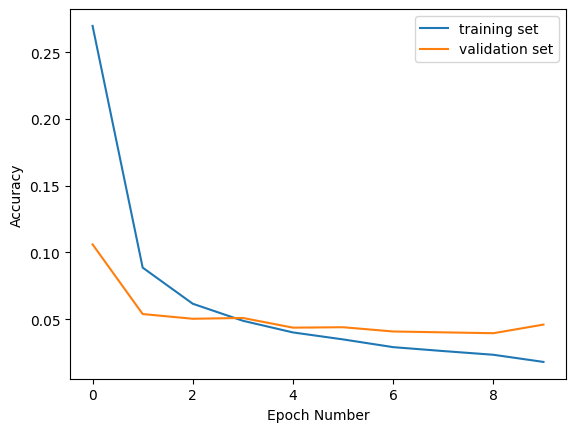

In [31]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

<h3>Accuracy plot curve for training and validation</h3>

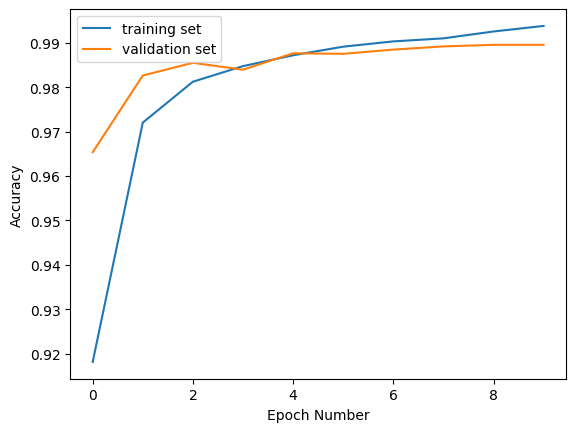

In [32]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

In [33]:
train_loss, train_accuracy = model.evaluate(x_train_normalize, y_train_reshape)

1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9978 - loss: 0.0078


In [34]:
print(train_loss, train_accuracy)

0.00706810038536787 0.9978868961334229


In [35]:
validation_loss , validaiton_accuracy = model.evaluate(x_validation_normalize, y_validation_reshape)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.9907 - loss: 0.0388


In [36]:
print(validation_loss, validaiton_accuracy)

0.04593595117330551 0.9895238280296326


<h2>Saving the model</h2>

In [38]:
model_name = "handwrittendigitrecognition.keras"
model.save(model_name)

<h2>Loading model</h2>

In [39]:
loaded_model = tf.keras.models.load_model(model_name)

d:\fnclick\python\ml\handwrittendigit\env\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [40]:
predictions_one_hot = loaded_model.predict([x_validation_normalize])

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [42]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,5.070065e-08,9.999999e-01,3.498029e-10,7.417810e-14,5.853573e-10,6.479580e-12,5.760679e-10,1.394558e-10,6.394230e-08,2.543873e-10
1,5.287343e-18,1.434258e-10,3.435052e-14,9.999998e-01,1.558473e-15,1.302596e-09,3.655969e-20,8.261404e-12,1.328500e-10,1.923624e-07
2,1.599133e-10,4.226507e-10,2.145686e-06,5.315815e-06,2.217142e-10,1.490278e-07,2.626413e-09,2.575195e-10,9.999920e-01,3.539403e-07
3,1.571013e-08,9.999999e-01,1.702217e-10,6.720588e-12,6.044424e-09,4.186257e-10,1.141234e-09,8.689761e-08,2.194597e-09,8.387879e-10
4,3.498192e-14,1.273549e-14,1.720535e-12,1.644575e-09,4.820629e-07,2.784959e-12,6.880576e-18,3.861014e-08,2.682704e-06,9.999968e-01
...,...,...,...,...,...,...,...,...,...,...
8395,1.165019e-22,8.795491e-17,2.277619e-17,7.129134e-26,1.000000e+00,1.257565e-19,8.683881e-15,1.240026e-18,1.338988e-18,2.612869e-16
8396,3.928308e-14,2.498621e-16,7.292287e-18,1.550753e-10,5.639974e-16,9.999412e-01,5.869718e-05,1.424623e-22,7.356278e-08,1.514226e-14
8397,3.216709e-13,1.744811e-12,4.151989e-12,1.009988e-13,6.193515e-09,1.805813e-11,1.152056e-15,1.000000e+00,2.717296e-12,1.854814e-08
8398,1.449415e-09,4.720457e-17,8.009371e-15,2.277820e-16,9.865952e-14,3.528968e-11,1.000000e+00,2.865228e-20,1.869708e-15,2.515045e-15


In [43]:
predictions_one_hot = loaded_model.predict([x_test_normalize])
print(predictions_one_hot.shape)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
(28000, 10)


In [44]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,5.900182e-10,7.972955e-12,1.000000e+00,3.088388e-08,2.613351e-13,8.678115e-16,1.661857e-13,4.699315e-11,3.027287e-10,1.970936e-15
1,9.999998e-01,3.625580e-13,5.313571e-09,3.049467e-12,4.554406e-13,3.959811e-10,9.974151e-08,4.385625e-08,6.133938e-11,8.575392e-08
2,7.723542e-11,1.214721e-09,2.569793e-09,4.032813e-07,2.651222e-06,2.308940e-09,2.748831e-13,1.882416e-06,1.403463e-06,9.999937e-01
3,5.251198e-01,1.583984e-09,1.303974e-05,1.137958e-03,3.751168e-04,8.994039e-05,3.969454e-04,1.852151e-07,3.240372e-04,4.725431e-01
4,3.101335e-11,2.150933e-08,5.282489e-06,9.999908e-01,2.697113e-12,6.786629e-10,2.113006e-12,1.262766e-07,3.828778e-06,3.926580e-09
...,...,...,...,...,...,...,...,...,...,...
27995,7.154970e-16,6.029984e-17,1.753710e-15,4.239951e-11,3.937703e-08,4.623628e-11,3.598603e-20,1.002261e-08,1.990181e-10,1.000000e+00
27996,1.213709e-11,5.786583e-11,1.864617e-07,4.054627e-09,9.726008e-09,6.534999e-10,4.886372e-14,9.999971e-01,2.475031e-11,2.608037e-06
27997,1.925045e-23,3.067810e-15,4.770669e-19,1.000000e+00,7.319616e-24,2.078248e-15,8.772990e-28,2.109484e-14,3.532200e-15,1.525714e-15
27998,1.757999e-11,7.753403e-11,3.406946e-11,1.843823e-07,1.339314e-06,3.965776e-09,8.604998e-15,1.801590e-05,8.927792e-10,9.999804e-01
